In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import folium
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors
import geocoder # import geocoder
import os

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

In [2]:
# define the dataframe columns
column_names = ['Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [3]:
# Berlin from https://en.wikipedia.org/wiki/Boroughs_and_neighborhoods_of_Berlin
ber_localities =["(0101) Mitte, Berlin, Germany", "(0104) Tiergarten, Berlin, Germany", 
                   "(0105) Wedding, Berlin, Germany", "(0102) Moabit, Berlin, Germany", 
                   "(0103) Hansaviertel, Berlin, Germany", "(0106) Gesundbrunnen, Berlin, Germany", 
                   "(0201) Friedrichshain, Berlin, Germany", "(0202) Kreuzberg, Berlin, Germany", 
                   "(0301) Prenzlauer Berg, Berlin, Germany", "(0302) Weißensee, Berlin, Germany", 
                   "(0303) Blankenburg, Berlin, Germany", "(0304) Heinersdorf, Berlin, Germany", 
                   "(0305) Karow, Berlin, Germany", "(0306) Stadtrandsiedlung Malchow, Berlin, Germany", 
                   "(0307) Pankow, Berlin, Germany", "(0308) Blankenfelde, Berlin, Germany", 
                   "(0309) Buch, Berlin, Germany", "(0310) Französisch Buchholz, Berlin, Germany", 
                   "(0311) Niederschönhausen, Berlin, Germany", "(0312) Rosenthal, Berlin, Germany", 
                   "(0313) Wilhelmsruh, Berlin, Germany", "(0401) Charlottenburg, Berlin, Germany", 
                   "(0402) Wilmersdorf, Berlin, Germany", "(0403) Schmargendorf, Berlin, Germany", 
                   "(0404) Grunewald, Berlin, Germany", "(0405) Westend, Berlin, Germany", 
                   "(0406) Charlottenburg-Nord, Berlin, Germany", "(0407) Halensee, Berlin, Germany", 
                   "(0501) Spandau, Berlin, Germany", "(0502) Haselhorst, Berlin, Germany", "(0503) Siemensstadt, Berlin, Germany", "(0504) Staaken, Berlin, Germany", "(0505) Gatow, Berlin, Germany", "(0506) Kladow, Berlin, Germany", "(0507) Hakenfelde, Berlin, Germany", "(0508) Falkenhagener Feld, Berlin, Germany", "(0509) Wilhelmstadt, Berlin, Germany", "(0601) Steglitz, Berlin, Germany", "(0602) Lichterfelde, Berlin, Germany", "(0603) Lankwitz, Berlin, Germany", "(0604) Zehlendorf, Berlin, Germany", "(0605) Dahlem, Berlin, Germany", "(0606) Nikolassee, Berlin, Germany", "(0607) Wannsee, Berlin, Germany", "(0701) Schöneberg, Berlin, Germany", "(0702) Friedenau, Berlin, Germany", "(0703) Tempelhof, Berlin, Germany", "(0704) Mariendorf, Berlin, Germany", "(0705) Marienfelde, Berlin, Germany", "(0706) Lichtenrade, Berlin, Germany", "(0801) Neukölln, Berlin, Germany", "(0802) Britz, Berlin, Germany", "(0803) Buckow, Neukölln, Berlin, Germany", "(0804) Rudow, Berlin, Germany", "(0805) Gropiusstadt, Berlin, Germany", "(0901) Alt-Treptow, Berlin, Germany", "(0902) Plänterwald, Berlin, Germany", "(0903) Baumschulenweg, Berlin, Germany", "(0904) Johannisthal, Berlin, Germany", "(0905) Niederschöneweide, Berlin, Germany", "(0906) Altglienicke, Berlin, Germany", "(0907) Adlershof, Berlin, Germany", "(0908) Bohnsdorf, Berlin, Germany", "(0909) Oberschöneweide, Berlin, Germany", "(0910) Köpenick, Berlin, Germany", "(0911) Friedrichshagen, Berlin, Germany", "(0912) Rahnsdorf, Berlin, Germany", "(0913) Grünau, Berlin, Germany", "(0914) Müggelheim, Berlin, Germany", "(0915) Schmöckwitz, Berlin, Germany", "(1001) Marzahn, Berlin, Germany", "(1002) Biesdorf, Berlin, Germany", "(1003) Kaulsdorf, Berlin, Germany", "(1004) Mahlsdorf, Berlin, Germany", "(1005) Hellersdorf, Berlin, Germany", "(1101) Friedrichsfelde, Berlin, Germany", "(1102) Karlshorst, Berlin, Germany", "(1103) Lichtenberg, Berlin, Germany", "(1104) Falkenberg, Berlin, Germany", "(1106) Malchow, Berlin, Germany", "(1107) Wartenberg, Berlin, Germany", "(1109) Neu-Hohenschönhausen, Berlin, Germany", "(1110) Alt-Hohenschönhausen, Berlin, Germany", "(1111) Fennpfuhl, Berlin, Germany", "(1112) Rummelsburg, Berlin, Germany", "(1201) Reinickendorf, Berlin, Germany", "(1202) Tegel, Berlin, Germany", "(1203) Konradshöhe, Berlin, Germany", "(1204) Heiligensee, Berlin, Germany", "(1205) Frohnau, Berlin, Germany", "(1206) Hermsdorf, Berlin, Germany", "(1207) Waidmannslust, Berlin, Germany", "(1208) Lübars, Berlin, Germany", "(1209) Wittenau, Berlin, Germany", "(1210) Märkisches Viertel, Berlin, Germany", "(1211) Borsigwalde, Berlin, Germany"]

In [4]:
# Amsterdam from https://en.wikipedia.org/wiki/Boroughs_of_Amsterdam
ams_localities = ["Binnenstad,  Amsterdam" , "Grachtengordel,  Amsterdam,  Netherlands" , 
                 "Haarlemmerbuurt,  Amsterdam,  Netherlands" , "Jodenbuurt,  Amsterdam, Noord-Holland, Nederland" , 
                 "Jordaan,  Amsterdam,  Netherlands" , "Kadijken,  Amsterdam,  Netherlands" , 
                 "Lastage,  Amsterdam,  Netherlands" , "Oosterdokseiland,  Amsterdam,  Netherlands" , 
                 "Oostelijke Eilanden,  Amsterdam,  Netherlands" , "Plantage,  Amsterdam,  Netherlands" , 
                 "Rapenburg,  Amsterdam,  Netherlands" , "Uilenburg,  Amsterdam,  Netherlands" , 
                 "Westelijke Eilanden,  Amsterdam,  Netherlands" , "Weteringschans,  Amsterdam,  Netherlands" , 
                 "Banne Buiksloot,  Amsterdam,  Netherlands" , "Buiksloot,  Amsterdam,  Netherlands" , 
                 "Buikslotermeer,  Amsterdam,  Netherlands" , "Floradorp,  Amsterdam,  Netherlands" , "Kadoelen,  Amsterdam,  Netherlands" , "Molenwijk,  Amsterdam,  Netherlands" , "Nieuwendam,  Amsterdam,  Netherlands" , "Nieuwendammerdijk en Buiksloterdijk,  Amsterdam,  Netherlands" , "Oostzanerwerf,  Amsterdam,  Netherlands" , "Overhoeks,  Amsterdam,  Netherlands" , "Tuindorp Nieuwendam,  Amsterdam,  Netherlands" , "Tuindorp Oostzaan,  Amsterdam,  Netherlands" , "Geuzenveld,  Amsterdam,  Netherlands" , "Nieuw Sloten,  Amsterdam,  Netherlands" , "Oostoever,  Amsterdam,  Netherlands" , "Osdorp,  Amsterdam,  Netherlands" , "Overtoomse Veld,  Amsterdam,  Netherlands" , "Sloten,  Amsterdam,  Netherlands" , "Slotermeer,  Amsterdam,  Netherlands" , "Slotervaart,  Amsterdam,  Netherlands" , "IJburg,  Amsterdam,  Netherlands" , "Indische Buurt,  Amsterdam,  Netherlands" , "Eastern Docklands,  Amsterdam,  Netherlands" , "Oud-Oost,  Amsterdam,  Netherlands" , "Watergraafsmeer,  Amsterdam,  Netherlands" , "Frederik Hendrikbuurt,  Amsterdam,  Netherlands" , "Houthaven,  Amsterdam,  Netherlands" , "Spaarndammerbuurt,  Amsterdam,  Netherlands" , "Staatsliedenbuurt,  Amsterdam,  Netherlands" , "Zeeheldenbuurt,  Amsterdam,  Netherlands" , "Westerpark,  Amsterdam,  Netherlands" , "Kinkerbuurt,  Amsterdam,  Netherlands" , "Overtoombuurt,  Amsterdam,  Netherlands" , "De Baarsjes,  Amsterdam,  Netherlands" , "Bos en Lommer,  Amsterdam,  Netherlands" , "Kolenkitbuurt,  Amsterdam,  Netherlands" , "Landlust,  Amsterdam,  Netherlands" , "Sloterdijk,  Amsterdam,  Netherlands" , "Westpoort,  Amsterdam,  Netherlands" , "Apollobuurt,  Amsterdam,  Netherlands" , "Buitenveldert,  Amsterdam,  Netherlands" , "Hoofddorppleinbuurt,  Amsterdam,  Netherlands" , "Museumkwartier,  Amsterdam,  Netherlands" , "De Pijp,  Amsterdam,  Netherlands" , "Prinses Irenebuurt,  Amsterdam,  Netherlands" , "Rivierenbuurt,  Amsterdam,  Netherlands" , "Schinkelbuurt,  Amsterdam,  Netherlands" , "Stadionbuurt,  Amsterdam,  Netherlands" , "Vondelpark,  Amsterdam,  Netherlands" , "Willemspark,  Amsterdam,  Netherlands" , "Zuidas,  Amsterdam,  Netherlands" , "Bijlmermeer,  Amsterdam,  Netherlands" , "Venserpolder,  Amsterdam,  Netherlands" , "Gaasperdam,  Amsterdam,  Netherlands" , "Driemond,  Amsterdam,  Netherlands"]


In [5]:
# Paris from https://en.wikipedia.org/wiki/Quarters_of_Paris
par_localities = ["Saint-Germain-l'Auxerrois, Paris, France" , "Les Halles, Paris, France" , 
                 "Palais-Royal, Paris, France" , "Place-Vendôme, Paris, France" , "Gaillon, Paris, France" , 
                 "Vivienne, Paris, France" , "Mail, Paris, France" , "Bonne-Nouvelle, Paris, France" , 
                 "Arts-et-Métiers, Paris, France" , "Enfants-Rouges, Paris, France" , "Archives, Paris, France" , 
                 "Sainte-Avoye, Paris, France" , "Saint-Merri, Paris, France" , "Saint-Gervais, Paris, France" , 
                 "Arsenal, Paris, France" , "Notre-Dame, Paris, France" , "Quartier Saint-Victor, Paris, France" , 
                 "Jardin-des-Plantes, Paris, France" , "Val-de-Grâce, Paris, France" , "Sorbonne, Paris, France" , 
                 "Monnaie, Paris, France" , "Odéon, Paris, France" , "Notre-Dame-des-Champs, Paris, France" , 
                 "Saint-Germain-des-Prés, Paris, France" , "Saint-Thomas-d'Aquin, Paris, France" , 
                 "Les Invalides, Paris, France" , "École-Militaire, Paris, France" , "Gros-Caillou, Paris, France" , "Champs-Élysées, Paris, France" , "Faubourg-du-Roule, Paris, France" , "La Madeleine, Paris, France" , "Europe, Paris, France" , "Saint-Georges, Paris, France" , "Chaussée-d'Antin, Paris, France" , "Faubourg-Montmartre, Paris, France" , "Rochechouart, Paris, France" , "Saint-Vincent-de-Paul, Paris, France" , "Porte-Saint-Denis, Paris, France" , "Porte-Saint-Martin, Paris, France" , "Hôpital-Saint-Louis, Paris, France" , "Folie-Méricourt, Paris, France" , "Saint-Ambroise, Paris, France" , "La Roquette, Paris, France" , "Sainte-Marguerite, Paris, France" , "Bel-Air, Paris, France" , "Picpus, Paris, France" , "Bercy, Paris, France" , "Quinze-Vingts, Paris, France" , "Salpêtrière, Paris, France" , "La Gare, Paris, France" , "Maison-Blanche, Paris, France" , "Croulebarbe, Paris, France" , "Montparnasse, Paris, France" , "Parc Montsouris, Paris, France" , "Petit-Montrouge, Paris, France" , "Plaisance, Paris, France" , "Saint-Lambert, Paris, France" , "Necker, Paris, France" , "Grenelle, Paris, France" , "Javel, Paris, France" , "Auteuil, Paris, France" , "La Muette, Paris, France" , "Porte-Dauphine, Paris, France" , "Chaillot, Paris, France" , "Les Ternes, Paris, France" , "Plaine Monceau, Paris, France" , "Batignolles, Paris, France" , "Épinettes, Paris, France" , "Grandes-Carrières, Paris, France" , "Clignancourt, Paris, France" , "Goutte-d'Or, Paris, France" , "La Chapelle, Paris, France" , "La Villette, Paris, France" , "Pont-de-Flandre, Paris, France" , "Amérique, Paris, France" , "Combat, Paris, France" , "Belleville, Paris, France" , "Saint-Fargeau, Paris, France" , "Père-Lachaise, Paris, France" , "Charonne, Paris, France"]


In [6]:
# My current neighborhood which I want to change
my_current_localities = ['Stationsplein, Eindhoven, Netherlands']

In [7]:
def receive_latitude_longitude(list_localities, neighborhoods):
    for i, loc in enumerate(list_localities):
        address = loc

        geolocator = Nominatim(user_agent="ny_explorer")
        location = geolocator.geocode(address)
        if location != None:
            latitude = location.latitude
            longitude = location.longitude
            neighborhoods = neighborhoods.append({'Neighborhood': address,
                                                  'Latitude': latitude,
                                                  'Longitude': longitude}, ignore_index=True)
        else: 
            print(loc, location)
    return neighborhoods

In [8]:
neighborhoods = receive_latitude_longitude(ber_localities,neighborhoods)
neighborhoods = receive_latitude_longitude(ams_localities, neighborhoods)
neighborhoods = receive_latitude_longitude(par_localities, neighborhoods)
neighborhoods = receive_latitude_longitude(my_current_localities, neighborhoods)

Jodenbuurt,  Amsterdam, Noord-Holland, Nederland None
Westelijke Eilanden,  Amsterdam,  Netherlands None
Nieuwendammerdijk en Buiksloterdijk,  Amsterdam,  Netherlands None
Overtoombuurt,  Amsterdam,  Netherlands None
Hoofddorppleinbuurt,  Amsterdam,  Netherlands None
Prinses Irenebuurt,  Amsterdam,  Netherlands None


In [54]:
neighborhoods.shape

(240, 3)

In [17]:
# create a world-map using latitude and longitude values of my_current_localities
# latitude_ber = 52.520008
# longitude_ber = 13.404954
map_berlin = folium.Map(location=[neighborhoods.iloc[-1]['Latitude'], 
                                  neighborhoods.iloc[-1]['Longitude']], 
                        zoom_start=6)

# add markers to map
for lat, lng, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_berlin)  
    
map_berlin

In [18]:
# Credentials for connection to Foursquare I save in my enviromental variables
CLIENT_ID = os.environ['FOURSQUARE_CLIENT_ID'] # Foursquare ID
CLIENT_SECRET = os.environ['FOURSQUARE_CLIENT_SECRET'] # Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 150

In [19]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        try:
            results = requests.get(url).json()["response"]['groups'][0]['items']
        except:
            results = requests.get(url).json()["response"]['groups'][0]['items']
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [20]:
all_venues = getNearbyVenues(names=neighborhoods['Neighborhood'],
                                   latitudes=neighborhoods['Latitude'],
                                   longitudes=neighborhoods['Longitude'], radius=500
                                  )
all_venues

(0101) Mitte, Berlin, Germany
(0104) Tiergarten, Berlin, Germany
(0105) Wedding, Berlin, Germany
(0102) Moabit, Berlin, Germany
(0103) Hansaviertel, Berlin, Germany
(0106) Gesundbrunnen, Berlin, Germany
(0201) Friedrichshain, Berlin, Germany
(0202) Kreuzberg, Berlin, Germany
(0301) Prenzlauer Berg, Berlin, Germany
(0302) Weißensee, Berlin, Germany
(0303) Blankenburg, Berlin, Germany
(0304) Heinersdorf, Berlin, Germany
(0305) Karow, Berlin, Germany
(0306) Stadtrandsiedlung Malchow, Berlin, Germany
(0307) Pankow, Berlin, Germany
(0308) Blankenfelde, Berlin, Germany
(0309) Buch, Berlin, Germany
(0310) Französisch Buchholz, Berlin, Germany
(0311) Niederschönhausen, Berlin, Germany
(0312) Rosenthal, Berlin, Germany
(0313) Wilhelmsruh, Berlin, Germany
(0401) Charlottenburg, Berlin, Germany
(0402) Wilmersdorf, Berlin, Germany
(0403) Schmargendorf, Berlin, Germany
(0404) Grunewald, Berlin, Germany
(0405) Westend, Berlin, Germany
(0406) Charlottenburg-Nord, Berlin, Germany
(0407) Halensee, Berl

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"(0101) Mitte, Berlin, Germany",52.517690,13.402376,Lustgarten,52.518469,13.399454,Garden
1,"(0101) Mitte, Berlin, Germany",52.517690,13.402376,Kuppelumgang Berliner Dom,52.518966,13.400981,Scenic Lookout
2,"(0101) Mitte, Berlin, Germany",52.517690,13.402376,Designpanoptikum - surreales Museum für indust...,52.516941,13.406072,Museum
3,"(0101) Mitte, Berlin, Germany",52.517690,13.402376,The Cathedral Museum,52.518606,13.400889,Museum
4,"(0101) Mitte, Berlin, Germany",52.517690,13.402376,Radisson Blu,52.519561,13.402857,Hotel
...,...,...,...,...,...,...,...
9111,"Stationsplein, Eindhoven, Netherlands",51.441515,5.479846,Underdog,51.437113,5.478755,Bar
9112,"Stationsplein, Eindhoven, Netherlands",51.441515,5.479846,Sakana Eindhoven,51.438026,5.475614,Sushi Restaurant
9113,"Stationsplein, Eindhoven, Netherlands",51.441515,5.479846,Pigmans Rassen Janssen Notarissen,51.442030,5.485718,Notary
9114,"Stationsplein, Eindhoven, Netherlands",51.441515,5.479846,Europcar,51.442828,5.485437,Rental Car Location


In [57]:
# rename French, German and Dutch restaurants categories to one category “Local cuisine restaurant” 
# to make clustering more unbiased
all_venues.loc[all_venues['Venue Category'] == 'German Restaurant', 'Venue Category'] = 'Local Cuisine Restaurant'
all_venues.loc[all_venues['Venue Category'] == 'French Restaurant', 'Venue Category'] = 'Local Cuisine Restaurant'
all_venues.loc[all_venues['Venue Category'] == 'Southwestern French Restaurant', 'Venue Category'] = 'Local Cuisine Restaurant'
all_venues.loc[all_venues['Venue Category'] == 'Dutch Restaurant', 'Venue Category'] = 'Local Cuisine Restaurant'

In [58]:
# drop neighborhoods which have less than 4 venues  
grouped = all_venues[["Neighborhood", "Venue Category"]].groupby('Neighborhood')
neighborhoods_to_drop = grouped.filter(lambda x: x["Venue Category"].count() < 4.)['Neighborhood'].unique()


for n in neighborhoods_to_drop:
    print(n)
    
    # Get names of indexes for which Neighborhood from the list
    indexVenues = all_venues[ all_venues['Neighborhood'] == n ].index

    # Delete these row indexes from all_venues
    all_venues.drop(indexVenues, inplace=True)
    
     # Delete these row indexes from neighborhoods
    indexNeigh = neighborhoods[neighborhoods['Neighborhood'] == n ].index
    neighborhoods.drop(indexNeigh, inplace=True)
all_venues.shape


(9100, 7)

In [59]:
all_venues[["Neighborhood", "Venue Category"]].groupby('Neighborhood').count()

,Venue Category
Neighborhood,
"(0101) Mitte, Berlin, Germany",49
"(0102) Moabit, Berlin, Germany",66
"(0103) Hansaviertel, Berlin, Germany",30
"(0104) Tiergarten, Berlin, Germany",13
"(0105) Wedding, Berlin, Germany",13
...,...
"Willemspark, Amsterdam, Netherlands",44
"Zeeheldenbuurt, Amsterdam, Netherlands",25
"Zuidas, Amsterdam, Netherlands",42


In [60]:
print('There are {} uniques categories.'.format(len(all_venues['Venue Category'].unique())))

There are 404 uniques categories.


In [72]:
# one hot encoding for categories
all_onehot = pd.get_dummies(all_venues[['Venue Category']], prefix="", prefix_sep="")


# add neighborhood column back to dataframe
all_onehot['Neighborhood'] = all_venues['Neighborhood'] 
all_onehot.head()

,ATM,Accessories Store,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,...,Water Park,Waterfront,Whisky Bar,Windmill,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
all_grouped = all_onehot.groupby('Neighborhood').mean().reset_index()
all_grouped

,Neighborhood,ATM,Accessories Store,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Aquarium,Arcade,Arepa Restaurant,...,Water Park,Waterfront,Whisky Bar,Windmill,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,"(0101) Mitte, Berlin, Germany",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"(0102) Moabit, Berlin, Germany",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"(0103) Hansaviertel, Berlin, Germany",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.033333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"(0104) Tiergarten, Berlin, Germany",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"(0105) Wedding, Berlin, Germany",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,"Willemspark, Amsterdam, Netherlands",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
226,"Zeeheldenbuurt, Amsterdam, Netherlands",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.04,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
227,"Zuidas, Amsterdam, Netherlands",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
228,"École-Militaire, Paris, France",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [80]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = all_grouped['Neighborhood']

for ind in np.arange(all_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(all_grouped.iloc[ind, :], num_top_venues)


neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"(0101) Mitte, Berlin, Germany",Local Cuisine Restaurant,Museum,Café,Hotel,Art Gallery,History Museum,Fountain,Concert Hall,Brewery,Breakfast Spot
1,"(0102) Moabit, Berlin, Germany",Café,Local Cuisine Restaurant,Doner Restaurant,Burger Joint,Hotel,Bar,Hostel,Gym / Fitness Center,Breakfast Spot,Shopping Mall
2,"(0103) Hansaviertel, Berlin, Germany",Café,Pedestrian Plaza,Art Museum,Sporting Goods Shop,Supermarket,Gym / Fitness Center,Liquor Store,Theater,Grocery Store,Mediterranean Restaurant
3,"(0104) Tiergarten, Berlin, Germany",Lounge,Breakfast Spot,Hotel Bar,Scandinavian Restaurant,Memorial Site,Local Cuisine Restaurant,Café,Sculpture Garden,Coffee Shop,Hotel
4,"(0105) Wedding, Berlin, Germany",Supermarket,Ice Cream Shop,Tennis Court,Organic Grocery,Big Box Store,Bus Stop,Gas Station,Pharmacy,Food & Drink Shop,Convenience Store


In [79]:
# what's the top 10 venues in my location
neighborhoods_venues_sorted[neighborhoods_venues_sorted['Neighborhood'] == my_current_localities[0]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
215,"Stationsplein, Eindhoven, Netherlands",Hotel,Coffee Shop,Restaurant,Café,Italian Restaurant,Bakery,Indonesian Restaurant,Gastropub,Multiplex,Optical Shop


In [94]:
# set number of clusters
kclusters = 10

all_grouped_clustering = all_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0, n_init=1000).fit(all_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([6, 0, 0, 0, 5, 0, 0, 0, 0, 2])

In [95]:
# add clustering labels 
try: 
    neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
except:
    print("Column already exists")
all_merged = neighborhoods

# merge grouped with data to add latitude/longitude for each neighborhood
all_merged = all_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
pd.to_numeric(all_merged['Cluster Labels'], downcast='integer')


all_merged.head() # check the cluster label columns!

Column already exists


,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"(0101) Mitte, Berlin, Germany",52.517690,13.402376,10.0,Local Cuisine Restaurant,Museum,Café,Hotel,Art Gallery,History Museum,Fountain,Concert Hall,Brewery,Breakfast Spot
1,"(0104) Tiergarten, Berlin, Germany",52.509778,13.357260,6.0,Lounge,Breakfast Spot,Hotel Bar,Scandinavian Restaurant,Memorial Site,Local Cuisine Restaurant,Café,Sculpture Garden,Coffee Shop,Hotel
2,"(0105) Wedding, Berlin, Germany",52.550123,13.341970,2.0,Supermarket,Ice Cream Shop,Tennis Court,Organic Grocery,Big Box Store,Bus Stop,Gas Station,Pharmacy,Food & Drink Shop,Convenience Store
3,"(0102) Moabit, Berlin, Germany",52.530102,13.342542,2.0,Café,Local Cuisine Restaurant,Doner Restaurant,Burger Joint,Hotel,Bar,Hostel,Gym / Fitness Center,Breakfast Spot,Shopping Mall
4,"(0103) Hansaviertel, Berlin, Germany",52.519123,13.341872,2.0,Café,Pedestrian Plaza,Art Museum,Sporting Goods Shop,Supermarket,Gym / Fitness Center,Liquor Store,Theater,Grocery Store,Mediterranean Restaurant


In [129]:
# I will drop clusters with 3 or less neighborhoods for simplicity of results interpretations
all_merged
 
grouped = all_merged[['Neighborhood', 'Cluster Labels']].groupby('Cluster Labels')
neighborhoods_to_drop = grouped.filter(lambda x: x['Cluster Labels'].count() <= 3.)['Neighborhood'].unique()

neighborhoods_to_drop
for n in neighborhoods_to_drop:
    print(n)
    
    # Get names of indexes for which Neighborhood from the list
    indexVenues = all_merged[ all_merged['Neighborhood'] == n ].index

    # Delete these row indexes from all_venues
    all_merged.drop(indexVenues, inplace=True)


all_merged.shape

(218, 14)

In [167]:
# I will drop neighborhoods with cluster "nan" and 0
# Get names of indexes for which Neighborhood from the list
indexVenues = all_merged[ all_merged['Cluster Labels'] != all_merged['Cluster Labels'] ].index

# Delete these row indexes from all_venues
all_merged.drop(indexVenues, inplace=True)

indexVenues = all_merged[ all_merged['Cluster Labels'] == 0.0 ].index

# Delete these row indexes from all_venues
all_merged.drop(indexVenues, inplace=True)

In [168]:
all_merged['Cluster Labels'].unique()

array([10.,  6.,  2.,  3.,  1.,  8.])

In [169]:

map_clusters = folium.Map(location=[latitude_ber, longitude_ber], zoom_start=11)
uniq_clusters = len(all_merged['Cluster Labels'].unique())
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(all_merged['Latitude'], 
                                  all_merged['Longitude'], 
                                  all_merged['Neighborhood'], 
                                  all_merged['Cluster Labels']):
    
    if cluster != cluster: # test for NaN
        print(lat, lon, poi, cluster)
        continue
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        color=rainbow[int(cluster)-1],  # "#505050"   rainbow[-int(cluster)+1]
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=1.0).add_to(map_clusters)
       
# show clusters near Berlin
map_clusters

In [170]:
# show clusters near Amsterdam
map_clusters.location=[52.370216,4.895168]
map_clusters

In [171]:
# show clusters near Paris
map_clusters.location=[48.864716, 2.349014]
map_clusters

In [172]:
# show my current neighborhood
map_clusters.location=[neighborhoods.iloc[-1]['Latitude'], 
                       neighborhoods.iloc[-1]['Longitude']]
map_clusters

### We can see that my neighborhood belongs to cluster 6.

In [173]:
# the full statistics about clusters
all_merged[['Cluster Labels', 'Neighborhood']].groupby('Cluster Labels').count()

,Neighborhood
Cluster Labels,
1.0,13
2.0,76
3.0,19
6.0,35
8.0,21
10.0,46


#8000ff 1.0
#4856fb 2.0
#10a2f0 3.0
#9cfba4 6.0
#ffa256 8.0
#ff0000 10.0


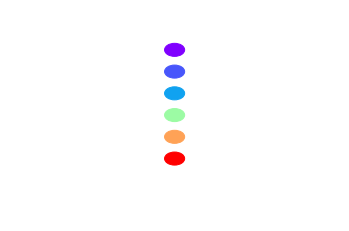

In [205]:
# colors for clusters
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots()
plt.axis('off')
sorted_clusters = sorted(all_merged['Cluster Labels'].unique())
for i, cluster in enumerate(sorted_clusters):
    circle_color = rainbow[int(cluster) - 1]
    print(circle_color, cluster)
    circle = plt.Circle((0.5, (8-i)/10.0), 0.03, color=circle_color)
    ax.add_artist(circle)

# Analyze cities

### Let's see which clusters we can see in Berlin

In [179]:

all_merged[all_merged['Neighborhood'].str.contains("Berlin")][['Cluster Labels', 'Neighborhood']].groupby('Cluster Labels').count()

,Neighborhood
Cluster Labels,
1.0,8
2.0,38
3.0,1
6.0,3
8.0,16
10.0,7


#### We can see that Berlin is very diverse city and at the sam time it has 3 neighborhoods which are similar to my current location. Also Berlin has neighborhoods from each clusters which we receive.
___

### Let's see which clusters we can see in Amsterdam

In [180]:

all_merged[all_merged['Neighborhood'].str.contains("Amsterdam")][['Cluster Labels', 'Neighborhood']].groupby('Cluster Labels').count()

,Neighborhood
Cluster Labels,
1.0,5
2.0,35
6.0,12
8.0,4
10.0,1


#### We can see that Amsterdam is less diverse than Berlin and at the same time it has a lot of neighborhoods (12) which are similar to my current location. Also Amsterdam doesn't have any neighborhoods from cluster 3.

Let's have a look which neighborhoods we clustered as cluster 3

In [181]:
all_merged.loc[all_merged['Cluster Labels'] == 3, all_merged.columns[[0] + list(range(4, all_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,"(0302) Weißensee, Berlin, Germany",Local Cuisine Restaurant,Hotel,Park,Beach,Vietnamese Restaurant,Café,Fishing Store,Falafel Restaurant,Farm,Farmers Market
183,"Saint-Thomas-d'Aquin, Paris, France",Local Cuisine Restaurant,Hotel,Italian Restaurant,Art Gallery,Café,Bakery,American Restaurant,Cheese Shop,Bistro,Tailor Shop
184,"Les Invalides, Paris, France",Hotel,Local Cuisine Restaurant,Italian Restaurant,Plaza,Café,History Museum,Cocktail Bar,Japanese Restaurant,Cheese Shop,Coffee Shop
185,"École-Militaire, Paris, France",Local Cuisine Restaurant,Hotel,Plaza,Coffee Shop,Japanese Restaurant,Historic Site,Sculpture Garden,Brasserie,Supermarket,Bistro
186,"Gros-Caillou, Paris, France",Local Cuisine Restaurant,Italian Restaurant,Hotel,Bistro,Ice Cream Shop,Coffee Shop,Café,Cheese Shop,Bakery,Garden
187,"Champs-Élysées, Paris, France",Hotel,Local Cuisine Restaurant,Japanese Restaurant,Italian Restaurant,Tailor Shop,Clothing Store,Art Gallery,Boutique,Cosmetics Shop,Spa
188,"Faubourg-du-Roule, Paris, France",Hotel,Local Cuisine Restaurant,Jewelry Store,Italian Restaurant,Japanese Restaurant,Electronics Store,Sporting Goods Shop,Café,Bakery,Scandinavian Restaurant
190,"Europe, Paris, France",Local Cuisine Restaurant,Hotel,Thai Restaurant,Restaurant,Bistro,Asian Restaurant,Korean Restaurant,Mediterranean Restaurant,Sushi Restaurant,Sandwich Place
193,"Faubourg-Montmartre, Paris, France",Local Cuisine Restaurant,Hotel,Italian Restaurant,Pizza Place,Cocktail Bar,Japanese Restaurant,Chinese Restaurant,Gym / Fitness Center,Burger Joint,Bakery
194,"Rochechouart, Paris, France",Local Cuisine Restaurant,Hotel,Bakery,Pizza Place,Coffee Shop,Vegetarian / Vegan Restaurant,Park,Convenience Store,Restaurant,Bar


We can see that these places full of local restaurants, Hotels, Cafes, etc.

### Let's see which clusters we can see in Paris

In [182]:

all_merged[all_merged['Neighborhood'].str.contains("Paris")][['Cluster Labels', 'Neighborhood']].groupby('Cluster Labels').count()

,Neighborhood
Cluster Labels,
2.0,3
3.0,18
6.0,19
8.0,1
10.0,38


#### We can see that Paris is also less diverse than Berlin and at the same time it has a lot of neighborhoods (19) which are similar to my current location. Also Paris doesn't have any neighborhoods from cluster 1.

Let's have a look which neighborhoods we clustered as cluster 1

In [183]:
all_merged.loc[all_merged['Cluster Labels'] == 1, all_merged.columns[[0] + list(range(4, all_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,"(0303) Blankenburg, Berlin, Germany",Bus Stop,Supermarket,Greek Restaurant,Café,Flower Shop,Farm,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop
20,"(0313) Wilhelmsruh, Berlin, Germany",Bus Stop,Post Office,Mexican Restaurant,Supermarket,Bakery,Cycle Studio,Dance Studio,Farmers Market,Fast Food Restaurant,Field
29,"(0502) Haselhorst, Berlin, Germany",Park,Furniture / Home Store,Supermarket,Automotive Shop,Bus Stop,Metro Station,Flea Market,Falafel Restaurant,Farm,Farmers Market
31,"(0504) Staaken, Berlin, Germany",Lake,Supermarket,Restaurant,Bus Stop,Flower Shop,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant
32,"(0505) Gatow, Berlin, Germany",Italian Restaurant,Supermarket,Trattoria/Osteria,Bus Stop,Harbor / Marina,Hotel,Fishing Store,Exhibit,Falafel Restaurant,Farm
36,"(0509) Wilhelmstadt, Berlin, Germany",Bus Stop,Harbor / Marina,Lake,Supermarket,Boat or Ferry,Park,Sporting Goods Shop,Department Store,Fondue Restaurant,Farmers Market
56,"(0902) Plänterwald, Berlin, Germany",Bus Stop,Supermarket,Light Rail Station,Flower Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop
87,"(1203) Konradshöhe, Berlin, Germany",Bus Stop,Italian Restaurant,Supermarket,Restaurant,River,Diner,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant
108,"Banne Buiksloot, Amsterdam, Netherlands",Bus Stop,Supermarket,Park,Bakery,Shopping Mall,Restaurant,Turkish Restaurant,Fish Market,Event Space,Exhibit
109,"Buiksloot, Amsterdam, Netherlands",Bus Stop,Park,Health & Beauty Service,Campground,Rest Area,Ice Cream Shop,Fishing Store,Falafel Restaurant,Farm,Farmers Market


These neighborhoods mostly have a lot of bus stops, farms and farmers markets.

## Conclusion
Personally, I'm searching for a city/neighborhood which is not similar to my current life situation. Because of it I don't choose Amsterdam and Paris as the cities with many neighborhoods similar to mine.
I see that Berlin is most interesting city for me with planty different neighborhoods.